C:\Anaconda\lib\site-packages\ipykernel_launcher.py:92: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


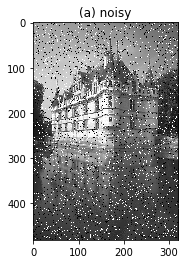

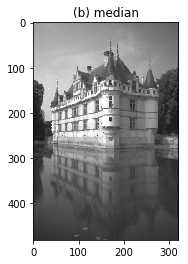

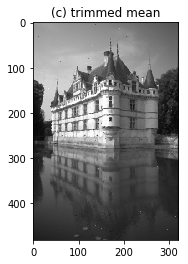

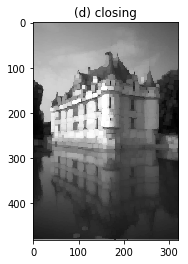

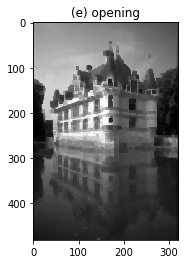

In [5]:
import numpy as np
from scipy.misc import imread
import matplotlib.pyplot as plt
import math
import random

def imshift(x, p, q):
    n1=x.shape[1]#columns
    n2=x.shape[0]#rows
    k=p%n2
    l=q%n1
    xshifted=np.zeros([n2,n1])
    xshifted[n2-k:n2,0:l]=x[0:k,n1-l:n1]
    xshifted[0:n2-k,l:n1]=x[k:n2,0:n1-l]
    xshifted[0:n2-k,0:l]=x[k:n2,n1-l:n1]
    xshifted[n2-k:n2,l:n1]=x[0:k,0:n1-l]
    return xshifted

#question(1)
def imstack(img,s1,s2):
    (n1,n2)=img.shape
    s=(2*s1+1)*(2*s2+1)
    xstack=np.zeros((n1,n2,s),dtype=np.uint8)
    i=0
    for l in range (-s2,s2+1):
        for k in range (-s1,s1+1):
            perimg=imshift(img,-k,l)
            xstack[:,:,i]=perimg[:,:]
            i=i+1
    return xstack
#question(2)
def imosf(x, type, s1, s2):
    (n1,n2)=x.shape
    s=(2*s1+1)*(2*s2+1)
    xosf=np.zeros((n1,n2))
    stack=imstack(x,s1,s2)
    for i in range (0,n1):
        for j in range (0,n2):
            amount=sorted(stack[i,j])
            amount=np.array(amount)
            if type=='median':
                xosf[i,j]=amount[int(amount.shape[0]/2)]  
            elif type=='erode':
                xosf[i,j]=np.max(amount)
            elif type=='dilate':
                xosf[i,j]=np.min(amount)
            else:
                xosf[i,j]=np.mean(amount[math.ceil(amount.shape[0]/4):math.floor(amount.shape[0]/(-4))])
    return xosf


#question(3)
def imclosing(img,s1,s2):
    (n1,n2)=img.shape
    imgclose=np.zeros((n1,n2))
    imgclose=imosf(img,'dilate', s1, s2)
    i=0
    while i<3:
        imgclose=imosf(imgclose,'erode',s1,s2)
        i=i+1
    return imgclose

def imopening(img,s1,s2):
    (n1,n2)=img.shape
    imgopen=np.zeros((n1,n2))
    imgopen=imosf(img, 'erode', s1, s2)
    i=0
    while i<3:
        imgopen=imosf(imgopen,'dilate',s1,s2)
        i=i+1
    return imgopen

#question4
def imnoising(img):
    p=0
    (n1,n2)=img.shape
    n=n1*n2
    while p<n//10:
        i=np.random.randint(0,n1)
        j=np.random.randint(0,n2)
        noise=random.random()
        if noise>0.5:
            noise=255
        else:
            noise=0
        img[i,j]=noise
        p=p+1
    return img

s1=1
s2=1
pic=imread('castle.png')
pic_noise=imnoising(pic)
plt.imshow(pic_noise,cmap='gray')
plt.title('(a) noisy')
plt.show()
pic_median=imosf(pic_noise, 'median', s1, s2)
plt.imshow(pic_median,cmap='gray')
plt.title('(b) median')
plt.show()
pic_trimmed=imosf(pic_noise, 'trimmed', s1, s2)
plt.imshow(pic_trimmed,cmap='gray')
plt.title('(c) trimmed mean')
plt.show()
pic_close=imclosing(pic,s1,s2)
plt.imshow(pic_close,cmap='gray')
plt.title('(d) closing')
plt.show()
pic_open=imopening(pic,s1,s2)
plt.imshow(pic_open,cmap='gray')
plt.title('(e) opening')
plt.show()